In [53]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('understat_per_game.csv')

In [54]:
data.shape
data['scored'].describe()


count    24580.000000
mean         1.341009
std          1.244176
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: scored, dtype: float64

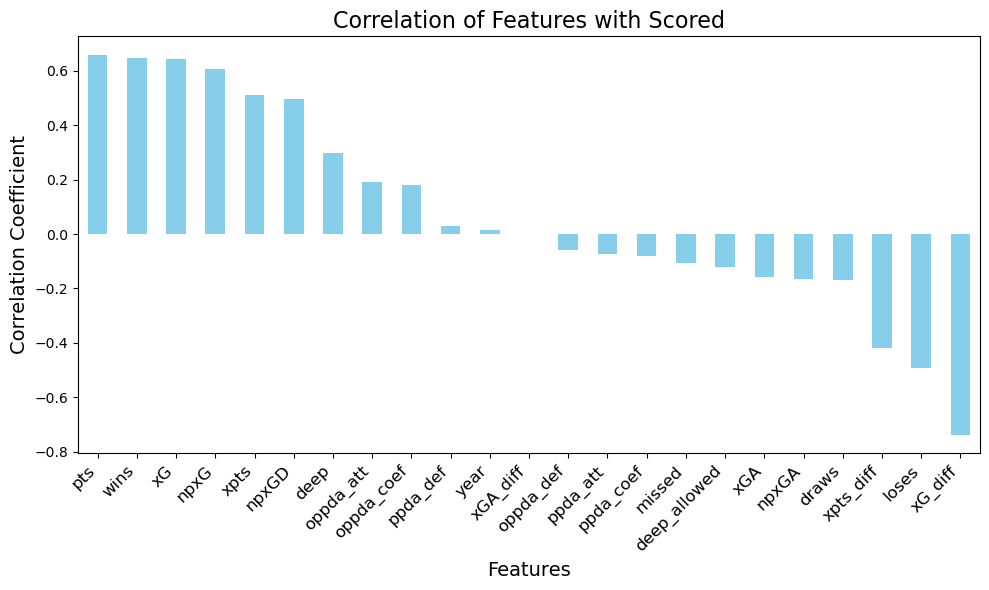

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'correlation_with_target' DataFrame is already created
# Replace 'data' with your dataset and 'scored' as the target variable

# Calculate correlation with 'scored'
correlation_with_scored = data.corr()['scored'].drop('scored').sort_values(ascending=False)

# Plot correlation as a bar chart
plt.figure(figsize=(10, 6))
correlation_with_scored.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Scored', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Save the bar chart as an image
plt.savefig('correlation_with_scored_bar_chart.png')
plt.show()


In [56]:
# Handle outliers in the target variable ('scored') using the IQR method
Q1 = data['scored'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['scored'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

'scored' feature: 160 outliers (0.65%)


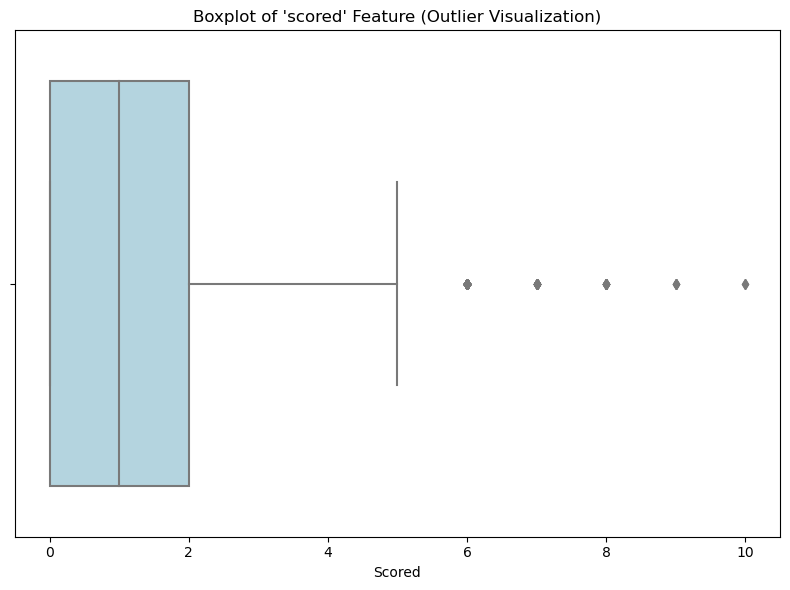

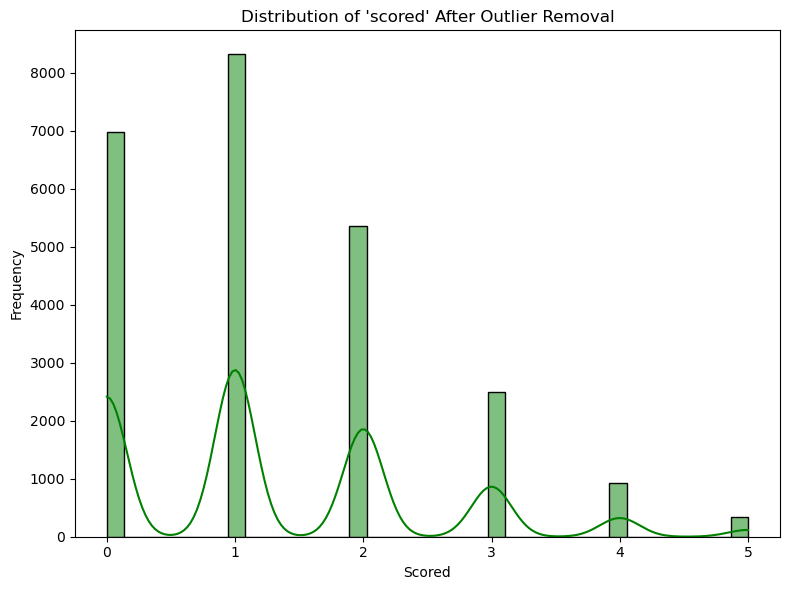

In [57]:
#Identify outliers
outliers = data[(data['scored'] < lower_bound) | (data['scored'] > upper_bound)]

# Percentage of outliers
percentage_outliers = (len(outliers) / len(data)) * 100
print(f"'scored' feature: {len(outliers)} outliers ({percentage_outliers:.2f}%)")

# Visualize the outliers using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['scored'], color='lightblue')
plt.title("Boxplot of 'scored' Feature (Outlier Visualization)")
plt.xlabel("Scored")
plt.tight_layout()
plt.savefig("scored_outlier_boxplot.png")  # Save the boxplot as an image
plt.show()

# Distribution of 'scored' after outlier removal
data_no_outliers = data[(data['scored'] >= lower_bound) & (data['scored'] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.histplot(data_no_outliers['scored'], kde=True, color='green')
plt.title("Distribution of 'scored' After Outlier Removal")
plt.xlabel("Scored")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("scored_distribution_after_outlier_removal.png")  # Save the histogram as an image
plt.show()

In [58]:
# Filter out the outliers
data = data[(data['scored'] >= lower_bound) & (data['scored'] <= upper_bound)]

In [59]:
data.shape

(24420, 29)

In [60]:
# Drop high-correlation features and non-useful columns
high_corr_features = ['pts', 'npxG', 'npxGD', 'xG', 'xG_diff', 'wins', 'npxG', 
                      'xpts', 'xGA_diff', 'xGA', 'npxGA', 'xpts_diff', 'loses', 'draws']
data = data.drop(columns=high_corr_features + ['result', 'date', 'team'])

In [61]:
data.shape
data

,league,year,h_a,deep,deep_allowed,scored,missed,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def
0,Bundesliga,2014,h,5,4,2,1,9.625000,231,24,21.850000,437,20
1,Bundesliga,2014,a,10,1,1,1,4.756098,195,41,17.695652,407,23
2,Bundesliga,2014,h,13,3,2,0,5.060606,167,33,16.961538,441,26
3,Bundesliga,2014,a,6,2,0,0,4.423077,115,26,9.446809,444,47
4,Bundesliga,2014,h,23,2,4,0,4.250000,170,40,44.800000,448,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24575,Serie_A,2019,h,7,6,1,3,15.500000,310,20,19.600000,294,15
24576,Serie_A,2019,a,5,7,1,2,12.650000,253,20,14.600000,292,20
24577,Serie_A,2019,h,5,7,3,1,13.777778,248,18,12.888889,348,27
24578,Serie_A,2019,a,11,10,2,3,25.454545,280,11,10.600000,212,20


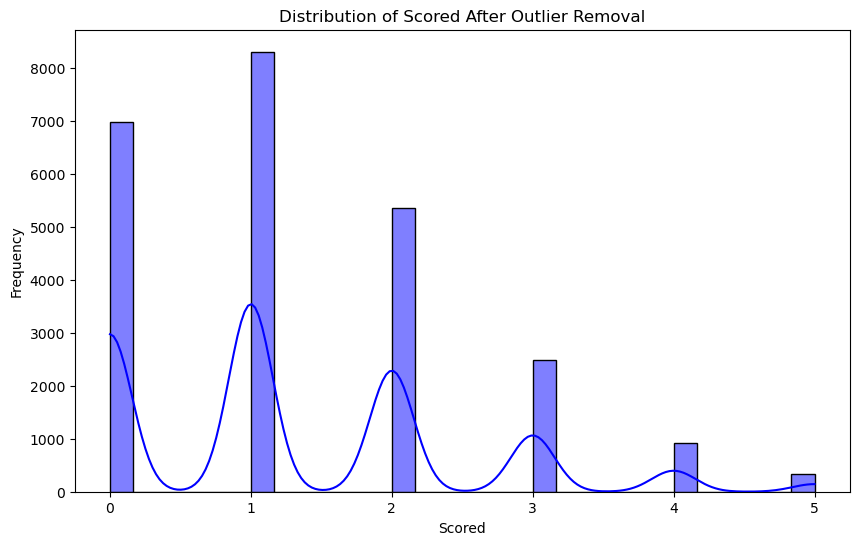

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of 'scored' after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(data['scored'], kde=True, bins=30, color='blue')
plt.title('Distribution of Scored After Outlier Removal')
plt.xlabel('Scored')
plt.ylabel('Frequency')
plt.show()

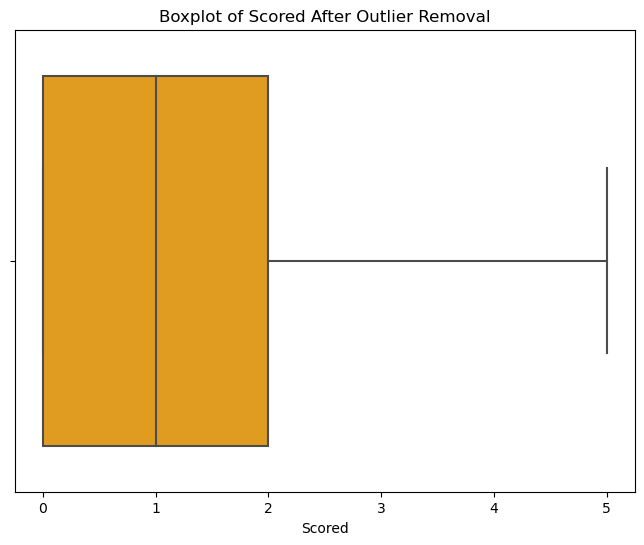

In [63]:
# Boxplot for visualizing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['scored'], color='orange')
plt.title('Boxplot of Scored After Outlier Removal')
plt.xlabel('Scored')
plt.show()

In [64]:
# Calculate the percentage of data points removed
initial_count = 24580  # Original dataset size
final_count = data.shape[0]
removed_percentage = ((initial_count - final_count) / initial_count) * 100
print(f"Percentage of data points removed: {removed_percentage:.2f}%")

Percentage of data points removed: 0.65%



Correlation of Features with 'scored':
scored          1.000000
deep            0.274962
oppda_att       0.169072
oppda_coef      0.153394
ppda_def        0.030255
year            0.018470
oppda_def      -0.048749
ppda_att       -0.067120
ppda_coef      -0.076502
missed         -0.102867
deep_allowed   -0.112864
Name: scored, dtype: float64


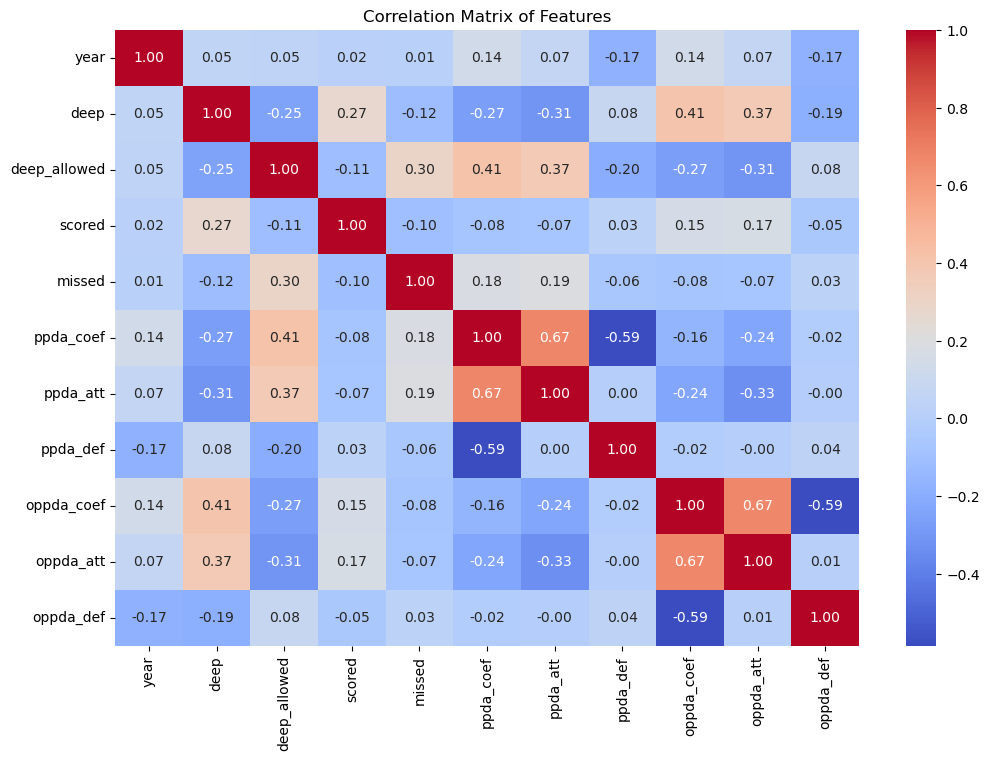

In [65]:
# Calculate correlations with 'scored'
correlation_matrix = data.corr()
scored_correlation = correlation_matrix['scored'].sort_values(ascending=False)
print("\nCorrelation of Features with 'scored':")
print(scored_correlation)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()

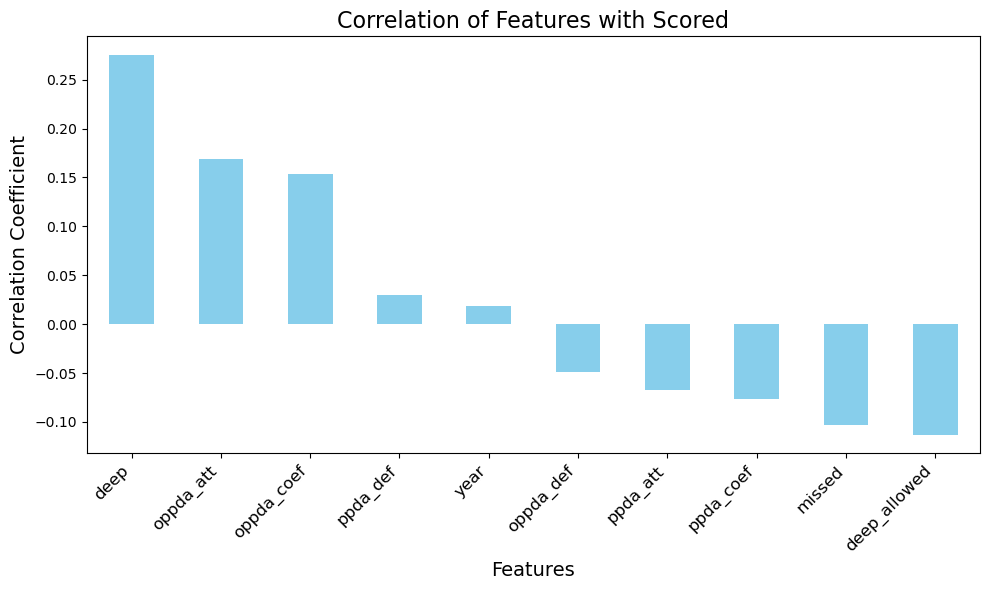

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'correlation_with_target' DataFrame is already created
# Replace 'data' with your dataset and 'scored' as the target variable

# Calculate correlation with 'scored'
correlation_with_scored = data.corr()['scored'].drop('scored').sort_values(ascending=False)

# Plot correlation as a bar chart
plt.figure(figsize=(10, 6))
correlation_with_scored.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Scored', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Save the bar chart as an image
plt.savefig('correlation_with_scored_bar_chart.png')
plt.show()


In [67]:
# Apply one-hot encoding to categorical columns ('h_a')
data = pd.get_dummies(data, columns=['h_a', 'league'], drop_first=True)
data

,year,deep,deep_allowed,scored,missed,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,h_a_h,league_EPL,league_La_liga,league_Ligue_1,league_RFPL,league_Serie_A
0,2014,5,4,2,1,9.625000,231,24,21.850000,437,20,1,0,0,0,0,0
1,2014,10,1,1,1,4.756098,195,41,17.695652,407,23,0,0,0,0,0,0
2,2014,13,3,2,0,5.060606,167,33,16.961538,441,26,1,0,0,0,0,0
3,2014,6,2,0,0,4.423077,115,26,9.446809,444,47,0,0,0,0,0,0
4,2014,23,2,4,0,4.250000,170,40,44.800000,448,10,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24575,2019,7,6,1,3,15.500000,310,20,19.600000,294,15,1,0,0,0,0,1
24576,2019,5,7,1,2,12.650000,253,20,14.600000,292,20,0,0,0,0,0,1
24577,2019,5,7,3,1,13.777778,248,18,12.888889,348,27,1,0,0,0,0,1
24578,2019,11,10,2,3,25.454545,280,11,10.600000,212,20,0,0,0,0,0,1


Dataset shape after removing outliers: (24420, 29)


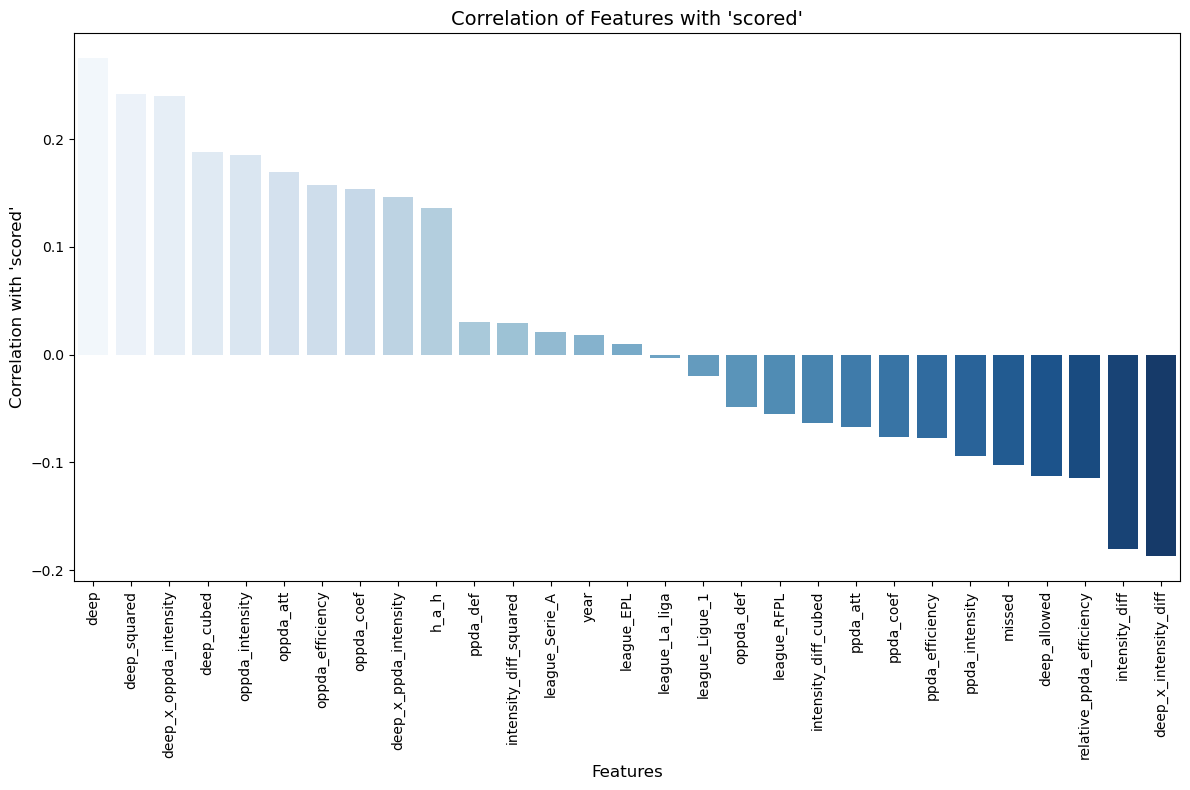

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Adjust this path or method to load your dataset correctly
data = pd.read_csv('understat_per_game.csv')

# Handle outliers in the target variable ('scored') using the IQR method
Q1 = data['scored'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['scored'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data = data[(data['scored'] >= lower_bound) & (data['scored'] <= upper_bound)]

print(f"Dataset shape after removing outliers: {data.shape}")

# Drop high-correlation features and non-useful columns
high_corr_features = ['pts', 'npxG', 'npxGD', 'xG', 'xG_diff', 'wins', 'npxG', 
                      'xpts', 'xGA_diff', 'xGA', 'npxGA', 'xpts_diff', 'loses', 'draws']
data = data.drop(columns=high_corr_features + ['result', 'date', 'team'])

# Step 4: Feature Engineering
data['ppda_efficiency'] = data['ppda_att'] / (data['ppda_def'] + 1)
data['oppda_efficiency'] = data['oppda_att'] / (data['oppda_def'] + 1)
data['relative_ppda_efficiency'] = data['ppda_efficiency'] / (data['oppda_efficiency'] + 1)
data['ppda_intensity'] = data['ppda_coef'] * data['ppda_att']
data['oppda_intensity'] = data['oppda_coef'] * data['oppda_att']
data['intensity_diff'] = data['ppda_intensity'] - data['oppda_intensity']

# Add interaction features
data['deep_x_ppda_intensity'] = data['deep'] * data['ppda_intensity']
data['deep_x_oppda_intensity'] = data['deep'] * data['oppda_intensity']
data['deep_x_intensity_diff'] = data['deep'] * data['intensity_diff']

# Add polynomial features for 'deep' and 'intensity_diff'
data['deep_squared'] = data['deep'] ** 2
data['deep_cubed'] = data['deep'] ** 3
data['intensity_diff_squared'] = data['intensity_diff'] ** 2
data['intensity_diff_cubed'] = data['intensity_diff'] ** 3

# Apply one-hot encoding to categorical columns ('h_a')
data = pd.get_dummies(data, columns=['h_a', 'league'], drop_first=True)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations with 'scored' column, excluding 'scored' itself
correlations = data.corr()['scored'].drop('scored').sort_values(ascending=False)

# Plot the bar graph for correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=correlations.index, y=correlations.values, palette="Blues")
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlation with 'scored'", fontsize=12)
plt.title("Correlation of Features with 'scored'", fontsize=14)
plt.tight_layout()
plt.show()

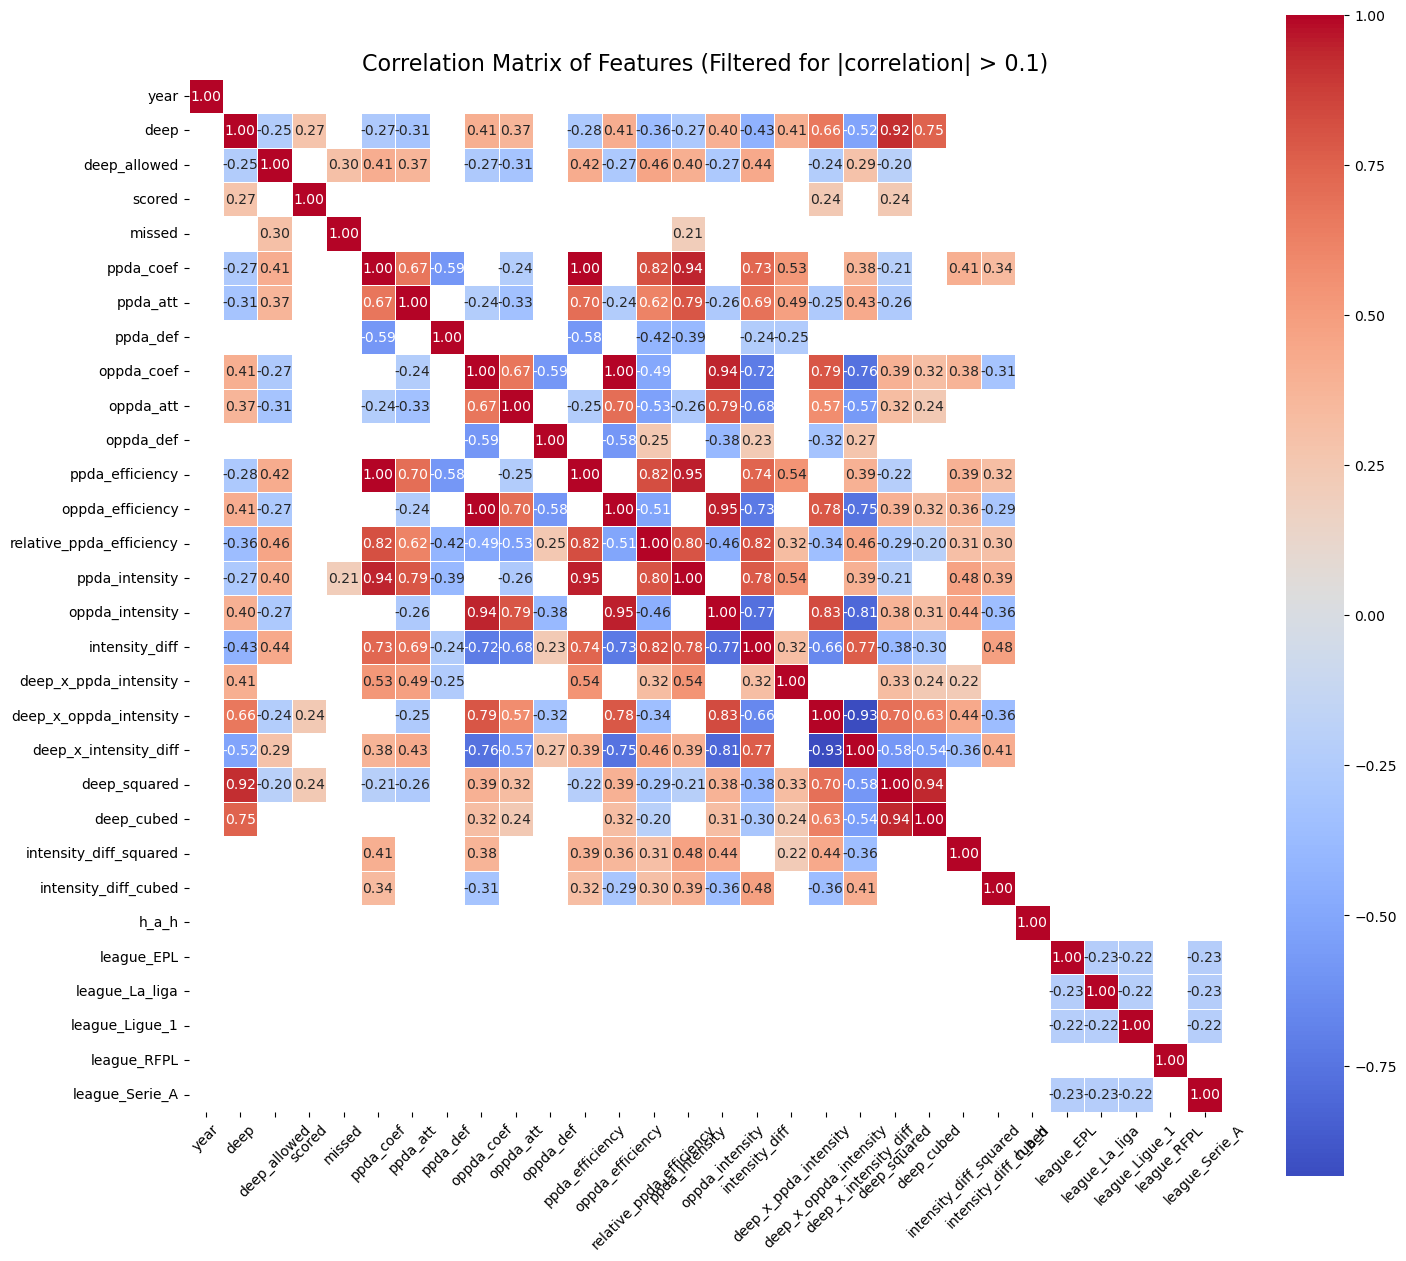

In [11]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Mask correlations below the threshold (e.g., absolute value < 0.1)
threshold = 0.2
mask = np.abs(correlation_matrix) < threshold
filtered_corr_matrix = correlation_matrix.copy()
filtered_corr_matrix[mask] = np.nan  # Replace low correlations with NaN to hide them

# Plot the heatmap
plt.figure(figsize=(15, 13))
sns.heatmap(
    filtered_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    mask=mask,
    linewidths=0.5
)
plt.title("Correlation Matrix of Features (Filtered for |correlation| > 0.1)", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()